En el siguiente codigo utilizo diferentes librerías para generar y visualizar modelos de clasificación a partir de una base de datos. Se utilizan las librerías de pandas para manejar la base de datos, scikit-learn para hacer machine learning y matplotlib para visualizar de mejor manera el modelado. En total se utilizan tres métodos de clasificación los cuales son: Regresión lineal, arbol de decisiones, KNN y clustering.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sklpre
import sklearn.model_selection as sklmod
import sklearn.linear_model as skllin
import sklearn.tree as skltree
import sklearn.neighbors as sklngb
import sklearn.metrics as metrics
import sklearn.cluster as sklklu
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Carga y renombre de varibles
BDob=pd.read_csv("Obesity.csv")
Niveles=BDob['NObeyesdad'].values
BDob=BDob[["Age","Height","Weight",'family_history_with_overweight','FAVC','CH2O','SCC','FAF','CALC','NObeyesdad']]
BDob.columns=["Edad",'Altura','Peso','Historial familiar','Consumo calorias','Consumo Agua','Monitoreo de calorias','Actividad Fisica','Consumo Alcohol','Nivel Obesidad']
BDob.head()

,Edad,Altura,Peso,Historial familiar,Consumo calorias,Consumo Agua,Monitoreo de calorias,Actividad Fisica,Consumo Alcohol,Nivel Obesidad
0,21.0,1.62,64.0,yes,no,2.0,no,0.0,no,Normal_Weight
1,21.0,1.52,56.0,yes,no,3.0,yes,3.0,Sometimes,Normal_Weight
2,23.0,1.80,77.0,yes,no,2.0,no,2.0,Frequently,Normal_Weight
3,27.0,1.80,87.0,no,no,2.0,no,2.0,Frequently,Overweight_Level_I
4,22.0,1.78,89.8,no,no,2.0,no,0.0,Sometimes,Overweight_Level_II


In [5]:
#Transformacion de variables
Encoder_Nob=sklpre.LabelEncoder()
BDob["Nivel Obesidad"]=Encoder_Nob.fit_transform(BDob["Nivel Obesidad"])
Encoder_Alc=sklpre.LabelEncoder()
BDob["Consumo Alcohol"]=Encoder_Alc.fit_transform(BDob["Consumo Alcohol"])
BDob.head()

,Edad,Altura,Peso,Historial familiar,Consumo calorias,Consumo Agua,Monitoreo de calorias,Actividad Fisica,Consumo Alcohol,Nivel Obesidad
0,21.0,1.62,64.0,yes,no,2.0,no,0.0,3,1
1,21.0,1.52,56.0,yes,no,3.0,yes,3.0,2,1
2,23.0,1.80,77.0,yes,no,2.0,no,2.0,1,1
3,27.0,1.80,87.0,no,no,2.0,no,2.0,1,5
4,22.0,1.78,89.8,no,no,2.0,no,0.0,2,6


In [6]:
#Selecciono las variables para mi primer modelo
BDob1=BDob[["Edad",'Altura','Peso','Nivel Obesidad']]

In [7]:
#Modelamiento con mis variables del primer modelo
#Particion del conjunto de datos
X1=BDob1[["Edad",'Altura','Peso']]
Y1=BDob1[["Nivel Obesidad"]]
X1_train,X1_test,Y1_train,Y1_test=sklmod.train_test_split(X1,Y1,test_size=0.2,random_state=0)
X1.head()

,Edad,Altura,Peso
0,21.0,1.62,64.0
1,21.0,1.52,56.0
2,23.0,1.80,77.0
3,27.0,1.80,87.0
4,22.0,1.78,89.8


Arbol de Decision. Precision entrenamiento: 1.0
Precision del modelo: 0.9505947190196834


Text(0.5, 0.98, 'Arbol de decisiones del primer modelo')

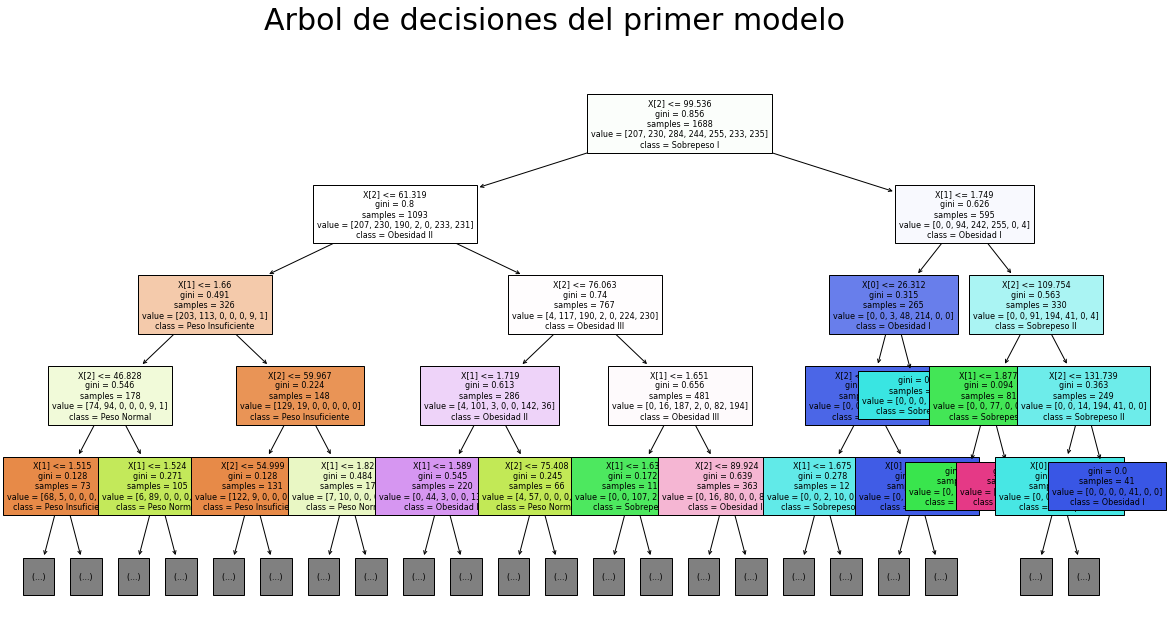

In [8]:
#Clasificacion del primer modelo usando Arbol de decision
AD1= skltree.DecisionTreeClassifier().fit(X1_train,Y1_train)
Y1_pred_AD1=AD1.predict(X1_test)
Precision1=AD1.score(X1_train,Y1_train)
print("Arbol de Decision. Precision entrenamiento: "+str(Precision1))
#Precision del modelo
precisionmod1=metrics.precision_score(Y1_test,Y1_pred_AD1,average='macro')
print("Precision del modelo: "+str(precisionmod1))
#Grafica del arbol de decisiones
fig=plt.figure(figsize=(20,10))
Clasificacion=['Peso Insuficiente','Peso Normal','Sobrepeso I','Sobrepeso II','Obesidad I','Obesidad II','Obesidad III']
skltree.plot_tree(AD1,max_depth=4,filled=True,fontsize=8,class_names=Clasificacion)
fig.suptitle("Arbol de decisiones del primer modelo",fontsize=30)

<ipython-input-9-1c6999518354>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN1=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X1_train,Y1_train)


Grupo mas cercano. Precision entrenamiento: 0.8584123222748815
Precision del modelo: 0.8228943637158384


<ipython-input-9-1c6999518354>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN1=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X1,Y1_train)
<ipython-input-9-1c6999518354>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_claro)


Text(0, 0.5, 'altura')

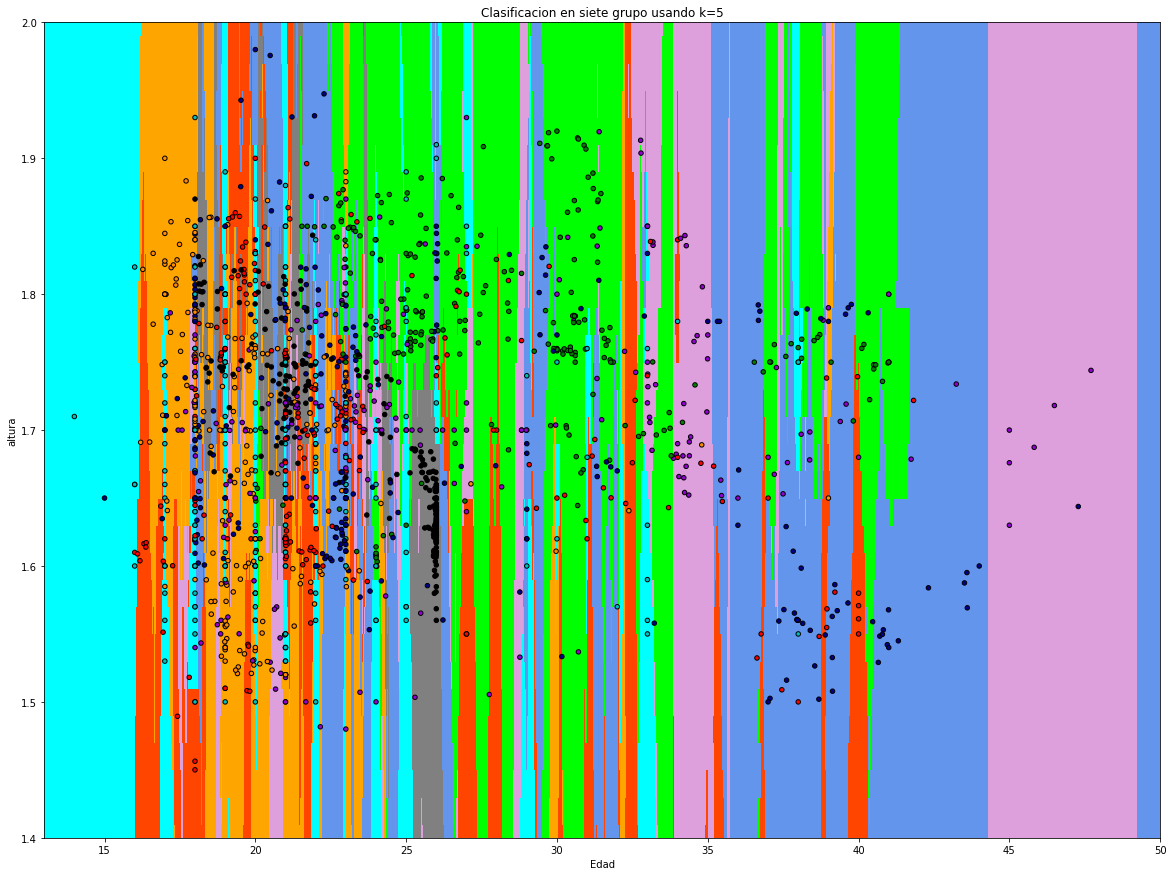

In [9]:
#Clasificacion usando KNN
k=5
KNN1=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X1_train,Y1_train)
Y1_pred_KNN = KNN1.predict(X1_test)
Precision2=KNN1.score(X1_train,Y1_train)
print("Grupo mas cercano. Precision entrenamiento: "+str(Precision2))
#Precision del modelo
precisionmod2=metrics.precision_score(Y1_test,Y1_pred_KNN,average='macro')
print("Precision del modelo: "+str(precisionmod2))

#Grafica del  modelo
cmap_claro=ListedColormap(['orange', 'cyan', 'cornflowerblue','lime','gray','orangered','plum'])
cmap_oscuro=ListedColormap(['darkorange', 'c', 'darkblue','green','black','red','darkviolet'])
X1=X1_train.to_numpy()
X1=X1[:,:2]
y=Y1_train.to_numpy()
KNN1=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X1,Y1_train)
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = KNN1.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,15))
plt.pcolormesh(xx, yy, Z, cmap=cmap_claro)
plt.title("Clasificacion en siete grupo usando k="+str(k))
plt.scatter(X1[:, 0], X1[:, 1], c=y.reshape(1688,), cmap=cmap_oscuro,edgecolor='k', s=20,label=Clasificacion)
plt.xlim(xx.min(), 50)
plt.ylim(1.4, 2.0)
plt.xlabel('Edad')
plt.ylabel('altura')

In [10]:
#Modelamiento con mis variables de la BDob3
#Para poder usar el modelo necesitamos transformar las variables categoricas en numericas
Encoder_Mon=sklpre.LabelEncoder()
BDob["Monitoreo de calorias"]=Encoder_Mon.fit_transform(BDob["Monitoreo de calorias"])
BDob3=BDob[['Altura','Peso','Consumo Agua','Monitoreo de calorias','Actividad Fisica','Nivel Obesidad']]
#Particion del conjunto de datos
X2=BDob3[['Altura','Peso','Consumo Agua','Monitoreo de calorias','Actividad Fisica']]
Y2=BDob3[['Nivel Obesidad']]
#Creamos nuestro grupos de train y test (entrenamiento y testeo)
X2_train,X2_test,Y2_train,Y2_test=sklmod.train_test_split(X2,Y2,test_size=0.2,random_state=0)

<ipython-input-11-23dee4029a20>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN3=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X2_train,Y2_train)
<ipython-input-11-23dee4029a20>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN3=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X2,y)


Grupo mas cercano. Precision entrenamiento: 0.818127962085308
Precision del modelo: 0.7304153407459552


<ipython-input-11-23dee4029a20>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_claro)


Text(0, 0.5, 'Peso')

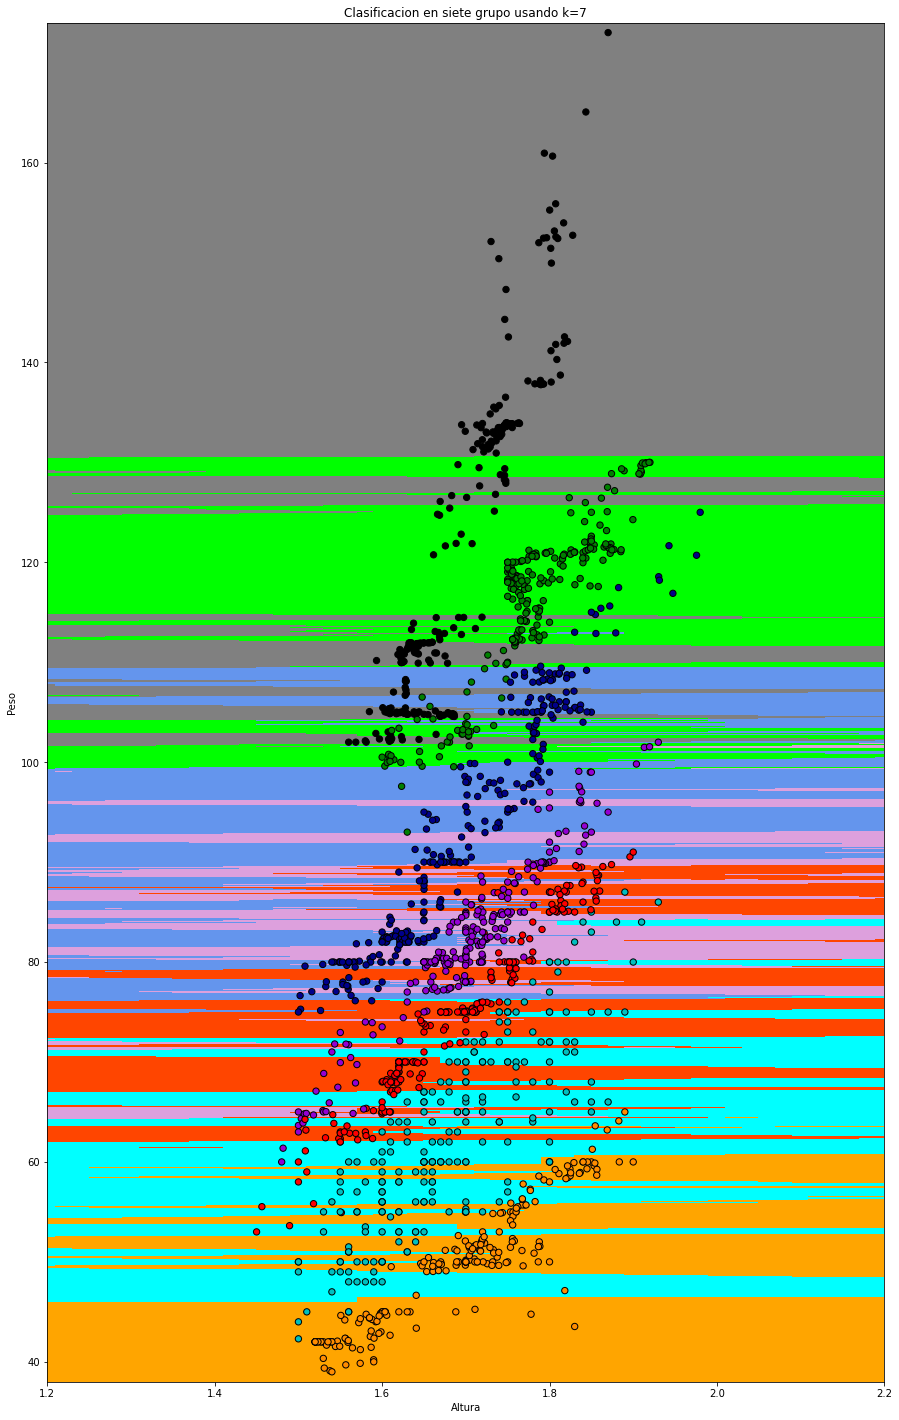

In [11]:
#Usando KNN en la BDob3
#Clasificacion usando KNN
k=7
KNN3=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X2_train,Y2_train)
Y2_pred_KNN = KNN3.predict(X2_test)
Precision3=KNN3.score(X2_train,Y2_train)
print("Grupo mas cercano. Precision entrenamiento: "+str(Precision3))
#Precision del modelo
precisionmod3=metrics.precision_score(Y2_test,Y2_pred_KNN,average='macro')
print("Precision del modelo: "+str(precisionmod3))

#Grafica del  modelo
X2=X2_train.to_numpy()
X2=X2[:,:2]
y=Y2_train.to_numpy()
KNN3=sklngb.KNeighborsClassifier(n_neighbors=k).fit(X2,y)
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
Z = KNN3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,25))
plt.pcolormesh(xx, yy, Z, cmap=cmap_claro)
plt.title("Clasificacion en siete grupo usando k="+str(k))
plt.scatter(X2[:, 0], X2[:, 1], c=y.reshape(1688,), cmap=cmap_oscuro,edgecolor='k', s=40)
plt.xlim(1.2, 2.2)
plt.ylim(yy.min(), yy.max())
plt.xlabel("Altura")
plt.ylabel('Peso')

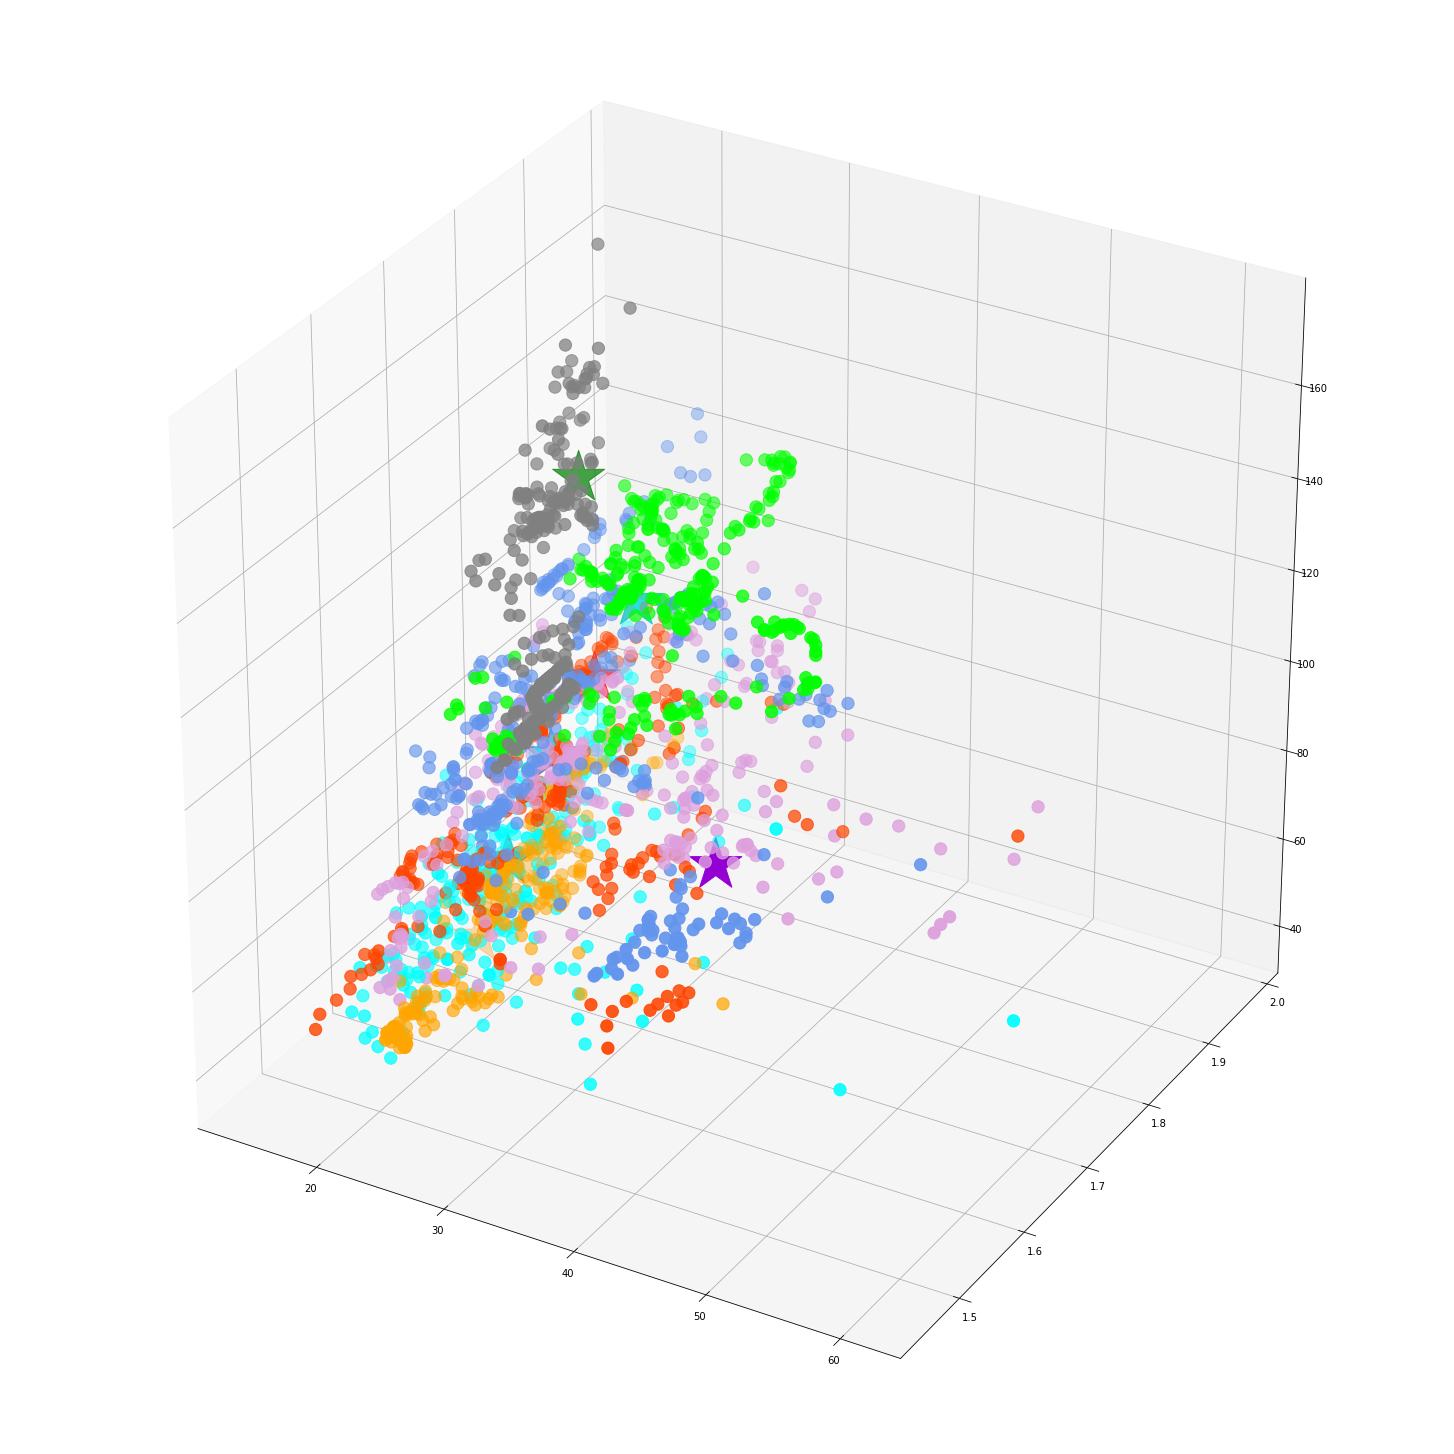

In [13]:
# Clustering usando 7 grupos
BDob1=BDob[['Edad','Altura','Peso']]
Mod1=BDob1.to_numpy()
klust1=sklklu.KMeans(n_clusters=7).fit(Mod1)
Cs=klust1.cluster_centers_
labels = BDob['Nivel Obesidad'].values
Col_claros=['orange', 'cyan', 'cornflowerblue','lime','gray','orangered','plum']
Col_oscuros=['darkorange', 'c', 'darkblue','green','black','red','darkviolet']

fig=plt.figure(figsize=(20,20))
ax=Axes3D(fig)
ax.scatter(Cs[:,0],Cs[:,1],Cs[:,2],marker='*',c=Col_oscuros,s=3000)
ax.scatter(Mod1[:,0],Mod1[:,1],Mod1[:,2],c=labels,cmap=cmap_claro,s=150)

Text(0, 0.5, 'Peso')

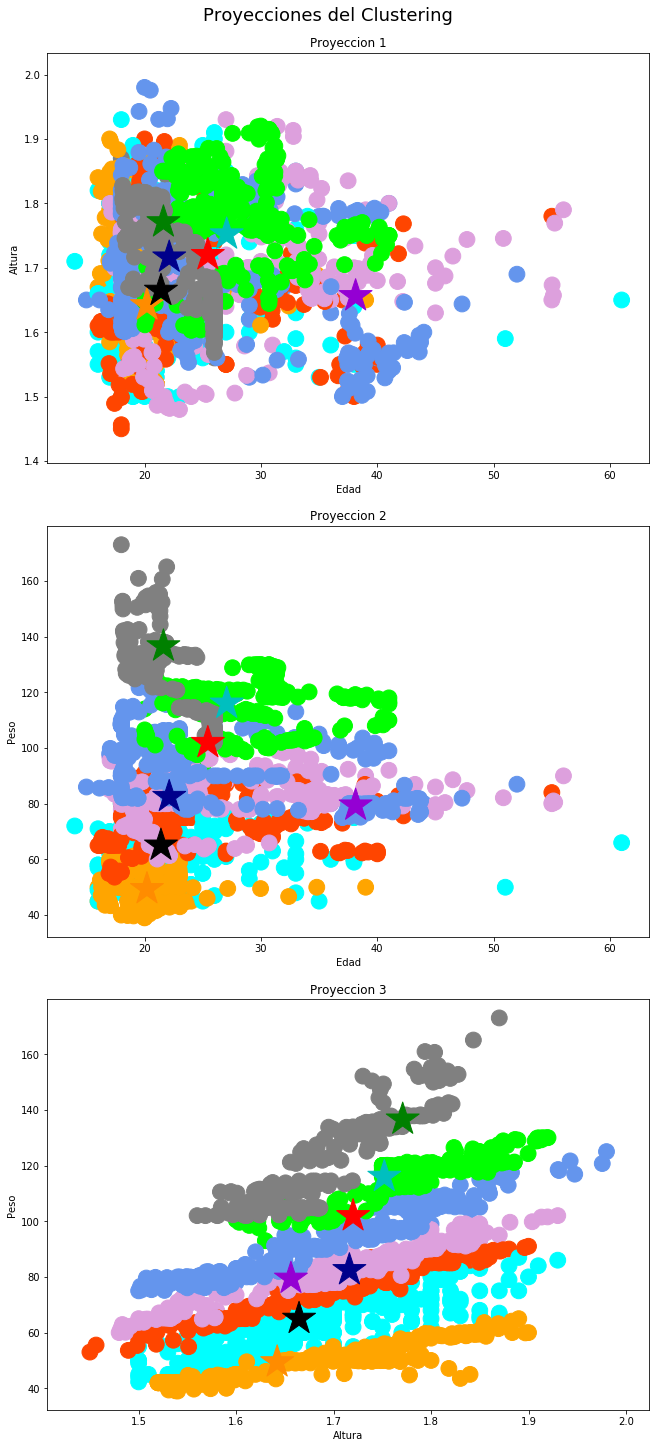

In [14]:
#Hacemos las proyecciones
fig, Proyecs=plt.subplots(3,1,figsize=(9,20),constrained_layout=True)
fig.suptitle("Proyecciones del Clustering",fontsize=18)
Proyecs[0].scatter(Mod1[:,0],Mod1[:,1],c=labels,cmap=cmap_claro,s=250)
Proyecs[0].scatter(Cs[:,0],Cs[:,1], marker='*',c=Col_oscuros,s=1200)
Proyecs[0].set_title("Proyeccion 1")
Proyecs[0].set_xlabel("Edad")
Proyecs[0].set_ylabel('Altura')
Proyecs[1].scatter(Mod1[:,0],Mod1[:,2],c=labels,cmap=cmap_claro,s=250)
Proyecs[1].scatter(Cs[:,0],Cs[:,2], marker='*',c=Col_oscuros,s=1200)
Proyecs[1].set_title("Proyeccion 2")
Proyecs[1].set_xlabel("Edad")
Proyecs[1].set_ylabel('Peso')
Proyecs[2].scatter(Mod1[:,1],Mod1[:,2],c=labels,cmap=cmap_claro,s=250)
Proyecs[2].scatter(Cs[:,1],Cs[:,2], marker='*',c=Col_oscuros,s=1200)
Proyecs[2].set_title("Proyeccion 3")
Proyecs[2].set_xlabel("Altura")
Proyecs[2].set_ylabel('Peso')

In [15]:
# Cantidad de ususarios en cada grupo de Obesidad
Conteo_Ob= pd.DataFrame()
Conteo_Ob['Nivel Obesidad']=labels
Cantidad=pd.DataFrame()
Colo_claros=['Naranja', 'Celeste', 'Azul','Verde','Gris','Rojo','Rosado']
Nivel_Ob=['Peso Insuficiente','Peso Normal','Sobrepeso I','Sobrepeso II','Obesidad I','Obesidad II','Obesidad III']
Cantidad['color']=Colo_claros
Cantidad['Nivel de Obesidad']=Nivel_Ob
Cantidad['Cantidad']=Conteo_Ob.groupby('Nivel Obesidad').size()
Cantidad.head(n=7)

,color,Nivel de Obesidad,Cantidad
0,Naranja,Peso Insuficiente,272
1,Celeste,Peso Normal,287
2,Azul,Sobrepeso I,351
3,Verde,Sobrepeso II,297
4,Gris,Obesidad I,324
5,Rojo,Obesidad II,290
6,Rosado,Obesidad III,290
